In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data PreProccessing

In [ ]:
dataTrain = pd.read_csv("salju_train.csv")
dataTest = pd.read_csv("salju_test.csv")

dataTrain = pd.concat([dataTrain,dataTest], ignore_index = True)
dataTrain.tail()

,id,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
127272,NaN,14/11/2012,C40,7.8,25.8,0.0,8.0,13.2,NE,31.0,ENE,NW,22.0,13.0,59.0,21.0,1017.1,1014.2,6.0,1.0,16.8,24.0,No,No
127273,NaN,24/10/2015,C40,12.4,26.6,0.0,8.0,11.6,NW,37.0,NE,WNW,17.0,20.0,59.0,25.0,1022.2,1018.7,1.0,1.0,17.1,25.7,No,No
127274,NaN,31/08/2010,C21,6.7,22.9,0.0,NaN,NaN,NaN,NaN,NaN,NW,0.0,4.0,84.0,35.0,NaN,NaN,1.0,2.0,11.8,22.0,No,No
127275,NaN,24/08/2013,C12,12.5,26.7,0.0,9.0,10.8,NE,35.0,SW,ENE,2.0,26.0,56.0,45.0,1021.9,1018.1,5.0,5.0,22.9,25.4,No,No
127276,NaN,26/10/2011,C22,12.3,15.9,8.2,NaN,NaN,SE,31.0,SW,SSE,15.0,15.0,87.0,74.0,NaN,NaN,NaN,NaN,13.8,15.4,Yes,Yes


In [ ]:
dataTrain.describe()

,id,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm
count,109095.000000,125990.000000,126183.000000,124459.000000,72397.000000,66180.000000,118307.000000,125726.000000,124620.000000,124945.000000,123355.000000,114085.000000,114116.000000,78391.000000,75350.000000,125718.000000,124137.000000
mean,54548.000000,12.201471,23.226354,2.377650,5.469173,7.603905,40.023726,14.040636,18.664412,68.880732,51.549212,1017.634863,1015.242807,4.450741,4.513603,16.999614,21.687295
std,31493.158146,6.395664,7.113840,8.550372,4.195609,3.790075,13.599594,8.912196,8.818594,19.018872,20.792633,7.121660,7.051440,2.885420,2.719652,6.484337,6.930820
min,1.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,27274.500000,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,54548.000000,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,81821.500000,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,109095.000000,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


# Handling Missing Value

In [ ]:
dataTrain.isnull().sum()/len(dataTrain)*100

id                          14.285378
Tanggal                      0.000000
KodeLokasi                   0.000000
SuhuMin                      1.011180
SuhuMax                      0.859543
Hujan                        2.214069
Penguapan                   43.118552
SinarMatahari               48.003174
ArahAnginTerkencang          7.090833
KecepatanAnginTerkencang     7.047621
ArahAngin9am                 7.252685
ArahAngin3pm                 2.901545
KecepatanAngin9am            1.218602
KecepatanAngin3pm            2.087573
Kelembaban9am                1.832224
Kelembaban3pm                3.081468
Tekanan9am                  10.364795
Tekanan3pm                  10.340439
Awan9am                     38.409139
Awan3pm                     40.798416
Suhu9am                      1.224887
Suhu3pm                      2.467060
BersaljuHariIni              2.214069
BersaljuBesok                2.239211
dtype: float64

In [ ]:
dataTrain = dataTrain.fillna(dataTrain.median()) 
dataTrain['ArahAnginTerkencang'] = dataTrain['ArahAnginTerkencang'].fillna(dataTrain['ArahAnginTerkencang'].value_counts().index[0])
dataTrain['ArahAngin9am'] = dataTrain['ArahAngin9am'].fillna(dataTrain['ArahAngin9am'].value_counts().index[0])
dataTrain['ArahAngin3pm'] = dataTrain['ArahAngin3pm'].fillna(dataTrain['ArahAngin3pm'].value_counts().index[0])

In [ ]:
dataTrain = dataTrain.dropna(axis = 0, subset = ['BersaljuHariIni'])
dataTrain = dataTrain.dropna(axis = 0, subset = ['BersaljuBesok'])

In [ ]:
dataTrain.isnull().sum()

id                          0
Tanggal                     0
KodeLokasi                  0
SuhuMin                     0
SuhuMax                     0
Hujan                       0
Penguapan                   0
SinarMatahari               0
ArahAnginTerkencang         0
KecepatanAnginTerkencang    0
ArahAngin9am                0
ArahAngin3pm                0
KecepatanAngin9am           0
KecepatanAngin3pm           0
Kelembaban9am               0
Kelembaban3pm               0
Tekanan9am                  0
Tekanan3pm                  0
Awan9am                     0
Awan3pm                     0
Suhu9am                     0
Suhu3pm                     0
BersaljuHariIni             0
BersaljuBesok               0
dtype: int64

# outlier treatment 
-Hujan
-penguapan
X kecepatan angin terkencang
-KecepatanAngin9am	
X KecepatanAngin3pm
Kelembaban9am
Kelembaban3pm

In [ ]:
dataTrain.describe()

,id,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm
count,123223.000000,123223.000000,123223.000000,123223.000000,123223.000000,123223.000000,123223.000000,123223.000000,123223.000000,123223.00000,123223.000000,123223.000000,123223.000000,123223.000000,123223.000000,123223.000000,123223.000000
mean,54538.859531,12.191745,23.238274,2.367349,5.188036,7.991779,39.898314,13.980564,18.641244,68.83921,51.474011,1017.634566,1015.239788,4.645829,4.700924,16.993845,21.684956
std,29155.500037,6.389619,7.100969,8.537904,3.197831,2.772579,13.128259,8.850308,8.727557,18.95003,20.543725,6.764562,6.697060,2.299532,2.123137,6.475326,6.867516
min,1.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.00000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,31833.500000,7.600000,17.900000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.00000,37.000000,1013.500000,1011.000000,3.000000,4.000000,12.300000,16.700000
50%,54548.000000,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.00000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,77264.500000,16.800000,28.200000,0.800000,5.400000,8.700000,46.000000,19.000000,24.000000,83.00000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.300000
max,109095.000000,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.00000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


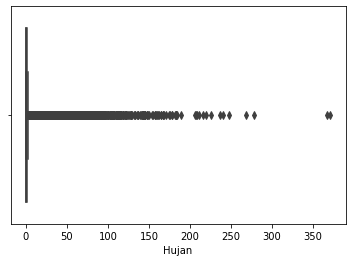

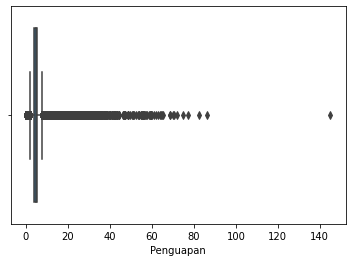

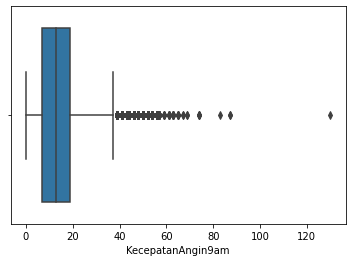

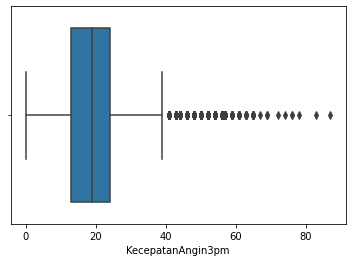

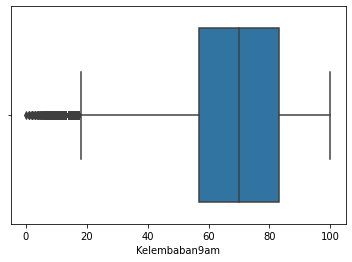

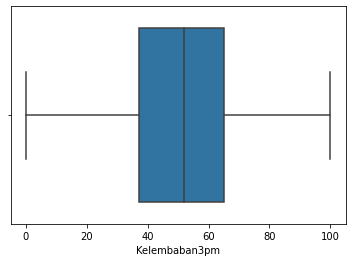

In [ ]:
plt1 = plt.figure(1)
sns.boxplot(x=dataTrain['Hujan'])

plt2 = plt.figure(2)
sns.boxplot(x=dataTrain['Penguapan'])

plt3 = plt.figure(3)
sns.boxplot(x=dataTrain['KecepatanAngin9am'])

plt4 = plt.figure(4)
sns.boxplot(x=dataTrain['KecepatanAngin3pm'])

plt5 = plt.figure(5)
sns.boxplot(x=dataTrain['Kelembaban9am'])

plt6 = plt.figure(6)
sns.boxplot(x=dataTrain['Kelembaban3pm'])

In [ ]:
dataTrain.Hujan[(dataTrain.Hujan>3*np.percentile(dataTrain.Hujan,[99])[0])] = 3*np.percentile(dataTrain.Hujan,[99])[0] #outlier Hujan
dataTrain.Penguapan[(dataTrain.Penguapan>3*np.percentile(dataTrain.Penguapan,[99])[0])] = 3*np.percentile(dataTrain.Penguapan,[99])[0] #outlier penguapan
dataTrain.KecepatanAngin9am[(dataTrain.KecepatanAngin9am>3*np.percentile(dataTrain.KecepatanAngin9am,[99])[0])] = 3*np.percentile(dataTrain.KecepatanAngin9am,[99])[0] #outlier KecepatanAngin9am
dataTrain.KecepatanAngin3pm[(dataTrain.KecepatanAngin3pm>3*np.percentile(dataTrain.KecepatanAngin3pm,[99])[0])] = 3*np.percentile(dataTrain.KecepatanAngin3pm,[99])[0] #outlier KecepatanAngin9am
dataTrain.Kelembaban9am[(dataTrain.Kelembaban9am < 0.3*np.percentile(dataTrain.Kelembaban9am,[1])[0])] = 0.3*np.percentile(dataTrain.Kelembaban9am,[1])[0] #outlier Kelembaban9am
dataTrain.Kelembaban3pm[(dataTrain.Kelembaban3pm < 0.3*np.percentile(dataTrain.Kelembaban3pm,[1])[0])] = 0.3*np.percentile(dataTrain.Kelembaban3pm,[1])[0] #outlier Kelembaban3pm

In [ ]:
dataTrain.describe()

,id,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm
count,123223.000000,123223.000000,123223.000000,123223.000000,123223.000000,123223.000000,123223.000000,123223.000000,123223.000000,123223.000000,123223.000000,123223.000000,123223.000000,123223.000000,123223.000000,123223.000000,123223.000000
mean,54538.859531,12.191745,23.238274,2.333254,5.182452,7.991779,39.898314,13.980458,18.641244,68.840020,51.474578,1017.634566,1015.239788,4.645829,4.700924,16.993845,21.684956
std,29155.500037,6.389619,7.100969,7.878515,3.096625,2.772579,13.128259,8.849002,8.727557,18.947262,20.542357,6.764562,6.697060,2.299532,2.123137,6.475326,6.867516
min,1.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,5.400000,2.700000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,31833.500000,7.600000,17.900000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,3.000000,4.000000,12.300000,16.700000
50%,54548.000000,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,77264.500000,16.800000,28.200000,0.800000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.300000
max,109095.000000,33.900000,48.100000,112.200000,47.400000,14.500000,135.000000,117.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


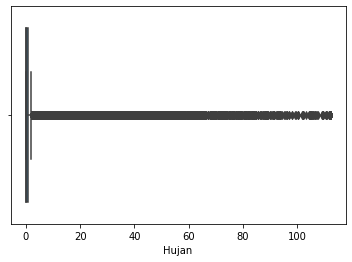

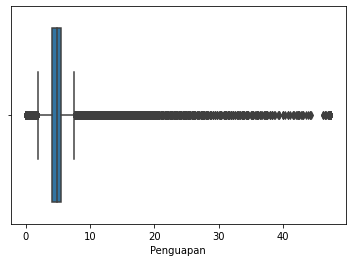

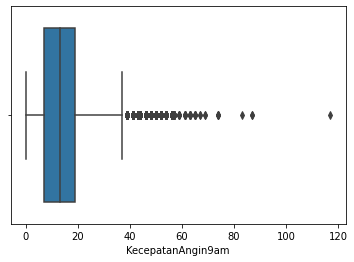

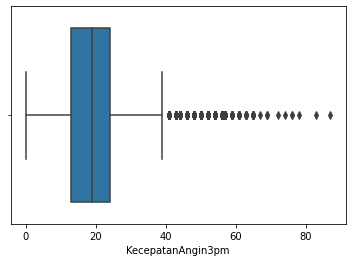

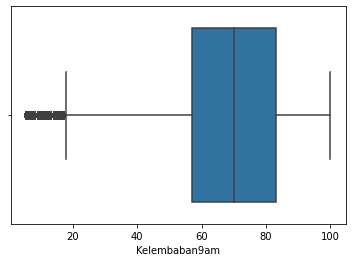

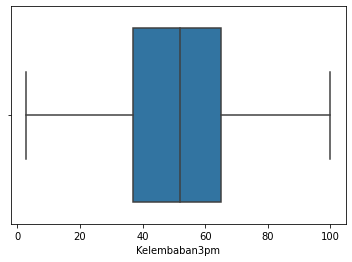

In [ ]:
plt1 = plt.figure(1)
sns.boxplot(x=dataTrain['Hujan'])

plt2 = plt.figure(2)
sns.boxplot(x=dataTrain['Penguapan'])

plt3 = plt.figure(3)
sns.boxplot(x=dataTrain['KecepatanAngin9am'])

plt4 = plt.figure(4)
sns.boxplot(x=dataTrain['KecepatanAngin3pm'])

plt5 = plt.figure(5)
sns.boxplot(x=dataTrain['Kelembaban9am'])

plt6 = plt.figure(6)
sns.boxplot(x=dataTrain['Kelembaban3pm'])

# Skewed Transformation
Hujan
Penguapan
SinarMatahari

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



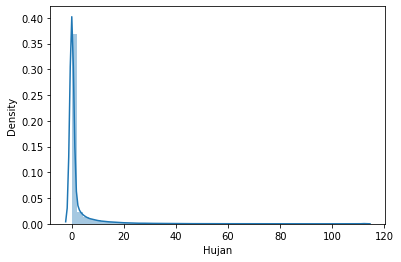

In [ ]:
sns.distplot(dataTrain['Hujan']) 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



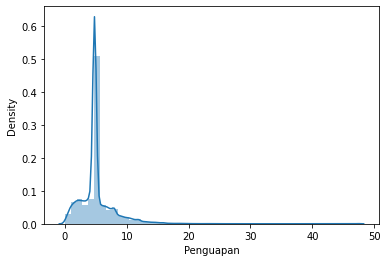

In [ ]:
sns.distplot(dataTrain['Penguapan'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



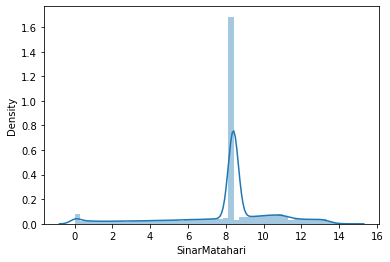

In [ ]:
sns.distplot(dataTrain['SinarMatahari'])

In [ ]:
dataTrain['Hujan'] = np.log(1+dataTrain['Hujan'])
dataTrain['Penguapan'] = np.log(1+dataTrain['Penguapan'])
dataTrain['SinarMatahari'] = np.sqrt(dataTrain['SinarMatahari'])

In [ ]:
dataTrain['Hujan'].skew()

2.0327766092401722

In [ ]:
dataTrain['Penguapan'].skew()

-0.435654832795442

In [ ]:
dataTrain['SinarMatahari'].skew()

-2.2136313209082417

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



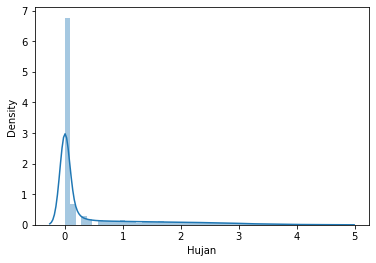

In [ ]:
sns.distplot(dataTrain['Hujan'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



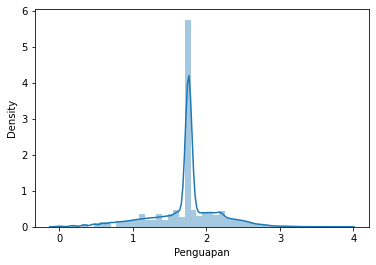

In [ ]:
sns.distplot(dataTrain['Penguapan'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



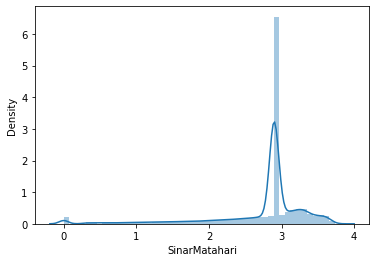

In [ ]:
sns.distplot(dataTrain['SinarMatahari'])

# Data Transformation

In [ ]:
dataTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123223 entries, 0 to 127276
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        123223 non-null  float64
 1   Tanggal                   123223 non-null  object 
 2   KodeLokasi                123223 non-null  object 
 3   SuhuMin                   123223 non-null  float64
 4   SuhuMax                   123223 non-null  float64
 5   Hujan                     123223 non-null  float64
 6   Penguapan                 123223 non-null  float64
 7   SinarMatahari             123223 non-null  float64
 8   ArahAnginTerkencang       123223 non-null  object 
 9   KecepatanAnginTerkencang  123223 non-null  float64
 10  ArahAngin9am              123223 non-null  object 
 11  ArahAngin3pm              123223 non-null  object 
 12  KecepatanAngin9am         123223 non-null  float64
 13  KecepatanAngin3pm         123223 non-null  f

In [ ]:
dataTrain['Tanggal'] = pd.to_datetime(dataTrain['Tanggal'])

In [ ]:
dataTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123223 entries, 0 to 127276
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   id                        123223 non-null  float64       
 1   Tanggal                   123223 non-null  datetime64[ns]
 2   KodeLokasi                123223 non-null  object        
 3   SuhuMin                   123223 non-null  float64       
 4   SuhuMax                   123223 non-null  float64       
 5   Hujan                     123223 non-null  float64       
 6   Penguapan                 123223 non-null  float64       
 7   SinarMatahari             123223 non-null  float64       
 8   ArahAnginTerkencang       123223 non-null  object        
 9   KecepatanAnginTerkencang  123223 non-null  float64       
 10  ArahAngin9am              123223 non-null  object        
 11  ArahAngin3pm              123223 non-null  object        
 12  Ke

# Correlation
suhu 9 am (0.026737)suhumin(-.082948)
suhu 9 am - suhumax(0.161139)
suhu 9 am - suuhu 3pm
suhu 3pm 0.193617- suhumax
Tekanan9am - Tekanan3pm
-Tekanan3pm

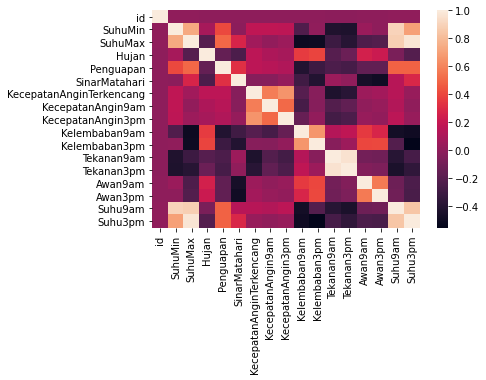

In [ ]:
sns.heatmap(dataTrain.corr())

# Data Deletion

In [ ]:
del dataTrain['Tekanan3pm']
del dataTrain['ArahAnginTerkencang']
# del dataTrain['Tanggal']
#del dataTrain['KodeLokasi']
del dataTrain['ArahAngin9am']
del dataTrain['ArahAngin3pm']
del dataTrain['id']
del dataTrain['BersaljuBesok']
# del dataTrain['Suhu3pm']
# del dataTrain['Suhu9am']
# del dataTrain['Hujan']
# del dataTrain['Penguapan']
del dataTrain['BersaljuHariIni']
# del dataTrain['Awan3pm']
# del dataTrain['Awan9am']
del dataTrain['KecepatanAngin3pm']
del dataTrain['KecepatanAngin9am']
del dataTrain['KecepatanAnginTerkencang']
del dataTrain['Tekanan9am']

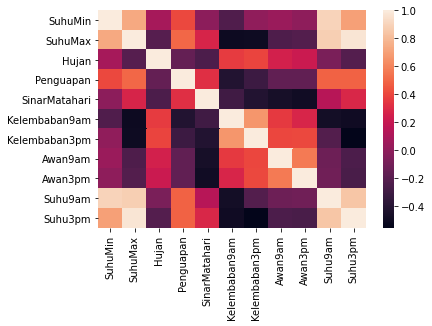

In [ ]:
sns.heatmap(dataTrain.corr())

# Feature Engineering

In [ ]:
# dataTrain['BersaljuHariIni'] = pd.get_dummies(dataTrain['BersaljuHariIni'])# tidak = 1, ya = 0
# dataTrain['BersaljuBesok'] = pd.get_dummies(dataTrain['BersaljuBesok'])# tidak = 1, ya = 0

In [ ]:
dataTrain['Bulan'] = pd.DatetimeIndex(dataTrain['Tanggal'],dayfirst=True).month
# dataTrain['Tahun'] = pd.DatetimeIndex(dataTrain['Tanggal'],dayfirst=True).year
# dataTrain['date'] = dataTrain['Bulan'].map(str)+ '-' +dataTrain['Tahun'].map(str)
# dataTrain['date'] = pd.to_datetime(dataTrain['date'], format='%m-%Y').dt.strftime('%m-%Y')


In [ ]:
dataTrain['KodeLokasi'] = dataTrain['KodeLokasi'].str[1:]
dataTrain['KodeLokasi'] = pd.to_numeric(dataTrain['KodeLokasi'])

In [ ]:
del dataTrain['Tanggal']

In [ ]:
dataTrain.head()

,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,Kelembaban9am,Kelembaban3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,Bulan
0,4,10.4,15.5,1.757858,1.757858,2.898275,78.0,76.0,5.0,5.0,13.1,15.0,1
1,10,9.0,17.0,2.197225,1.280934,2.720294,80.0,61.0,7.0,5.0,11.9,15.5,7
2,46,18.2,32.0,0.000000,1.757858,2.898275,62.0,42.0,5.0,5.0,23.8,29.6,2
3,36,7.3,24.5,0.000000,2.240710,3.224903,25.0,17.0,1.0,7.0,15.3,23.2,8
4,7,5.9,20.3,0.000000,1.526056,3.549648,55.0,48.0,2.0,6.0,12.4,18.1,10


# Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
df_norm = pd.DataFrame(scaler.fit_transform(dataTrain), columns=dataTrain.columns)
df_norm.head()

,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,Kelembaban9am,Kelembaban3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,Bulan
0,0.062500,0.445755,0.383743,0.371706,0.453115,0.761124,0.767442,0.753340,0.555556,0.555556,0.428270,0.391555,0.000000
1,0.187500,0.412736,0.412098,0.464612,0.330180,0.714384,0.788584,0.599178,0.777778,0.555556,0.402954,0.401152,0.545455
2,0.937500,0.629717,0.695652,0.000000,0.453115,0.761124,0.598309,0.403905,0.555556,0.555556,0.654008,0.671785,0.090909
3,0.729167,0.372642,0.553875,0.000000,0.577577,0.846901,0.207188,0.146968,0.111111,0.777778,0.474684,0.548944,0.636364
4,0.125000,0.339623,0.474480,0.000000,0.393364,0.932183,0.524313,0.465570,0.222222,0.666667,0.413502,0.451056,0.818182


# K-Means Clustering

In [ ]:
import random 
kolom = df_norm.columns # menyimpan kolom dari df_norm
# dataframe dijadikan array
X = np.array(df_norm) 
#inisialisasi awal centroid
centroid_awal = random.sample(range(0,len(df_norm)),2) 
centroids = []
#mencari data dengan index centroid awal
for i in centroid_awal:      
  centroids.append(df_norm.loc[i])
#dijadikan array dari list
centroids = np.array(centroids) 
#euclidan distance
def euclid_distance(x1,x2):
  return(sum((x1-x2)**2))**0.5 
#ic sebagai centroid, x sebagai dataframe
def findClosestCentroids(ic, X): 
    assigned_centroid = []
    distElbow=[]
    for i in X:
        distance=[]
        for j in ic:
            distance.append(euclid_distance(i, j))            #jarak tiap centroid ke titik di dataFrame atau array
        assigned_centroid.append(np.argmin(distance))       #jarak minimum dari ke K centroid akan diappend
        distElbow.append(np.min(distance))                  #nilai dari jarak minimum dimasukkan ke list untuk penentuan nilai pada Elbow Method
    return assigned_centroid,distElbow

def calc_centroids(clusters, X):
    new_centroids = []
    new_df = pd.concat([pd.DataFrame(X, columns = kolom), pd.DataFrame(clusters, columns=['cluster'])],
                      axis=1)                                                           #membuat dataFrame baru dari array dengan tambahan kolom kluster 
    for c in set(new_df['cluster']): 
        current_cluster = new_df[new_df['cluster'] == c][new_df.columns[:-1]]           #mengelompokkan dataframe dengan nilai cluster yang sama selain kolom terakhir yakni kolom kluster
        cluster_mean = current_cluster.mean(axis=0)       #menghitung mean dari current_cluster
        new_centroids.append(cluster_mean)                #nilai mean dijadikan centroid baru
    
    return new_centroids,new_df       #nilai centroid baru dan dataframe di return

sum_dist=[]
for i in range(3):
  get_centroids,get_elbow = findClosestCentroids(centroids, X) 
  centroids,df = calc_centroids(get_centroids, X)
  get_elbow = np.array(get_elbow)    #merubah tipe data menjadi array
  sum_dist.append(np.sum(get_elbow))  #ditambahkan ke list dari jumlah get_elbow
    #print(centroids)
    # plt.figure()
    # plt.scatter(np.array(centroids)[:, 0], np.array(centroids)[:, 1], color='black')
    # plt.scatter(X[:, 0], X[:, 1], alpha=0.1)
    # plt.show()

# plt.figure()
# plt.scatter(np.array(centroids)[:, 0], np.array(centroids)[:, 1], color='black')
# plt.scatter(X[:, 0], X[:, 1], alpha=0.1)
# plt.show()  

# Visualization

In [ ]:
import plotly.express as px
pie=df.groupby('cluster').size().reset_index()
pie.columns=['cluster','value']
px.pie(pie,values='value',names='cluster',color=['blue','red'])

In [ ]:
polar=df.groupby("cluster").mean().reset_index()
polar=pd.melt(polar,id_vars=["cluster"])
fig4 = px.line_polar(polar, r="value", theta="variable", color="cluster", line_close=True,height=800,width=1400)
fig4.show()

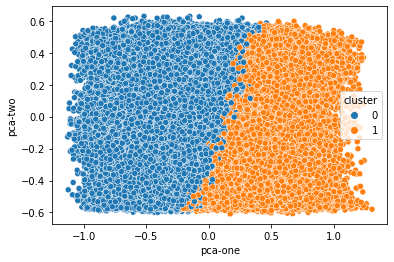

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
label = df['cluster']
label = label.to_list()
df = df.drop('cluster', axis=1)
pca = pca.fit_transform(df)
df = pd.DataFrame()

df['pca-one'] = pca[:,0]
df['pca-two'] = pca[:,1]
df['cluster'] = label

sns.scatterplot(data=df, x='pca-one', y='pca-two', hue='cluster')

# Elbow Method

In [ ]:
X = np.array(df_norm) 
sum_K = []
#inisialisasi awal centroid
for i in range(1,10):
  centroid_awal = random.sample(range(0,len(df_norm)),i) 
  centroids = []
  #mencari data dengan index centroid awal
  for j in centroid_awal:      
    centroids.append(df_norm.loc[j])
  #dijadikan array dari list
  centroids = np.array(centroids)
  for k in range(1):
    get_centroids,get_elbow = findClosestCentroids(centroids, X) 
    centroids,df = calc_centroids(get_centroids, X)
    get_elbow = np.array(get_elbow)    
    sum_K.append(np.sum(get_elbow)) 

In [ ]:
sum_K

[137686.7018185905,
 94257.2575363382,
 102431.67426560305,
 93413.37583488204,
 88999.31946607845,
 89642.27945624822,
 79453.89614606848,
 76480.69614460455,
 76128.53038859485]

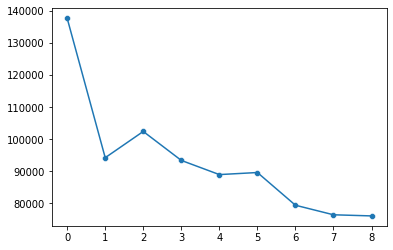

In [ ]:
sns.lineplot(data=sum_K)
sns.scatterplot(data = sum_K)